In [ ]:
'''Visualization'''
import matplotlib.pyplot as plt
import seaborn as sns

'''Data Handeling and Linear Algebra'''
import pandas as pd
import numpy as np

'''Manipulating Data and Model Building'''
import tensorflow as tf

''' Ignore warnings'''
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import load_model

In [ ]:
# Take a look into the data
data=pd.read_csv("Sunspots.csv")
data.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [ ]:
# Check the last year in the data
data.tail()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
3260,3260,2020-09-30,0.6
3261,3261,2020-10-31,14.4
3262,3262,2020-11-30,34.0
3263,3263,2020-12-31,21.8
3264,3264,2021-01-31,10.4


In [ ]:
# General information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         3265 non-null   int64  
 1   Date                               3265 non-null   object 
 2   Monthly Mean Total Sunspot Number  3265 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 76.6+ KB


In [ ]:
# Last column ---> Sunspots data
sunspots = data.iloc[:,-1]
sunspots.values

array([ 96.7, 104.3, 116.7, ...,  34. ,  21.8,  10.4])

# DATA VISUALISATION

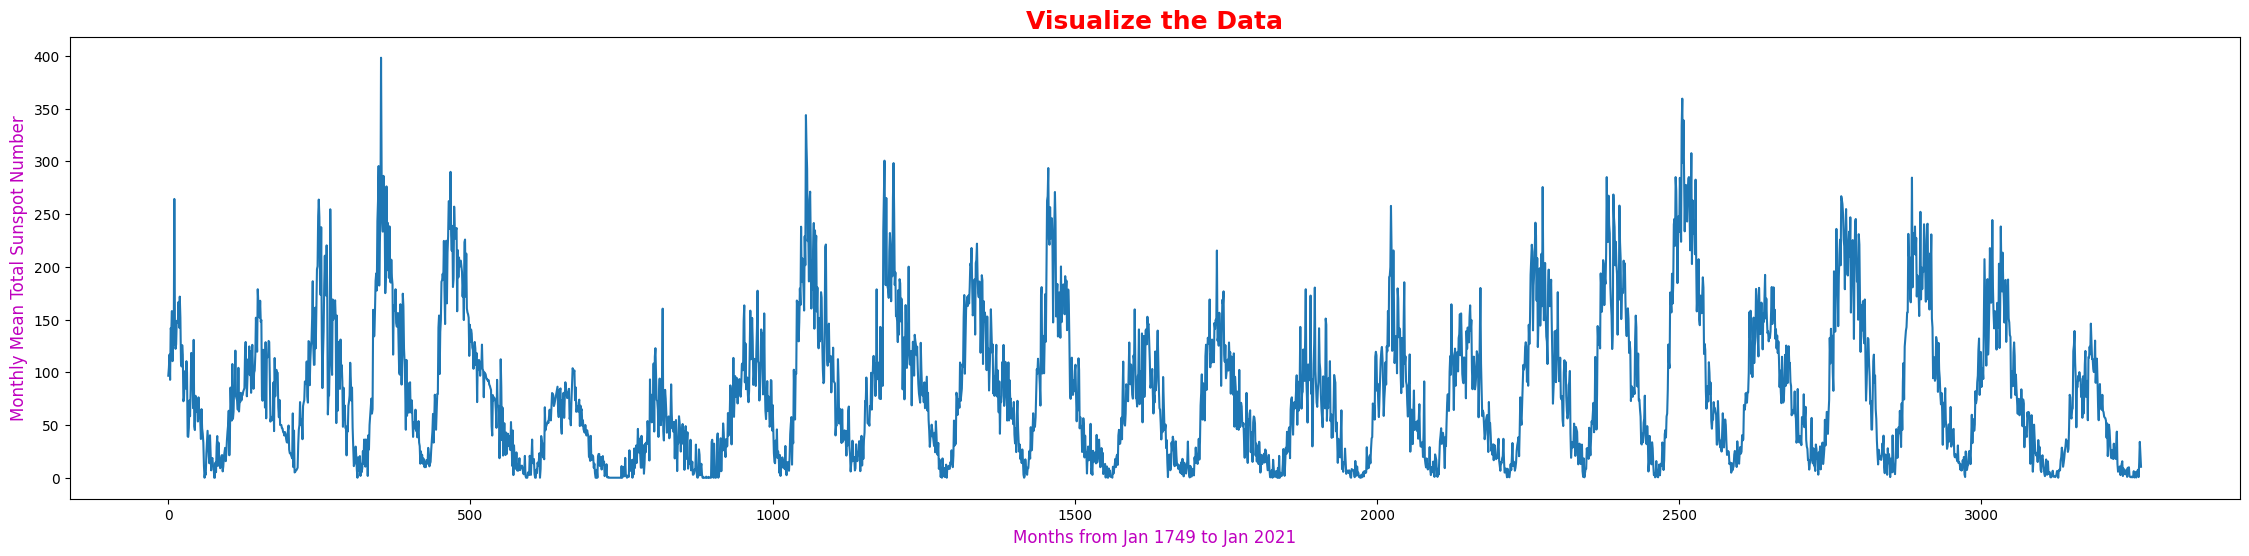

In [ ]:
# Visualize the data
plt.figure(figsize=(28,6))
plt.plot(sunspots)
plt.ylabel(data.columns[-1], fontsize = 12, color = 'm')
plt.xlabel("Months from Jan 1749 to Jan 2021", fontsize = 12, color = 'm')
plt.title("Visualize the Data", fontsize = 18, color = 'r', weight = 'bold')
plt.show()

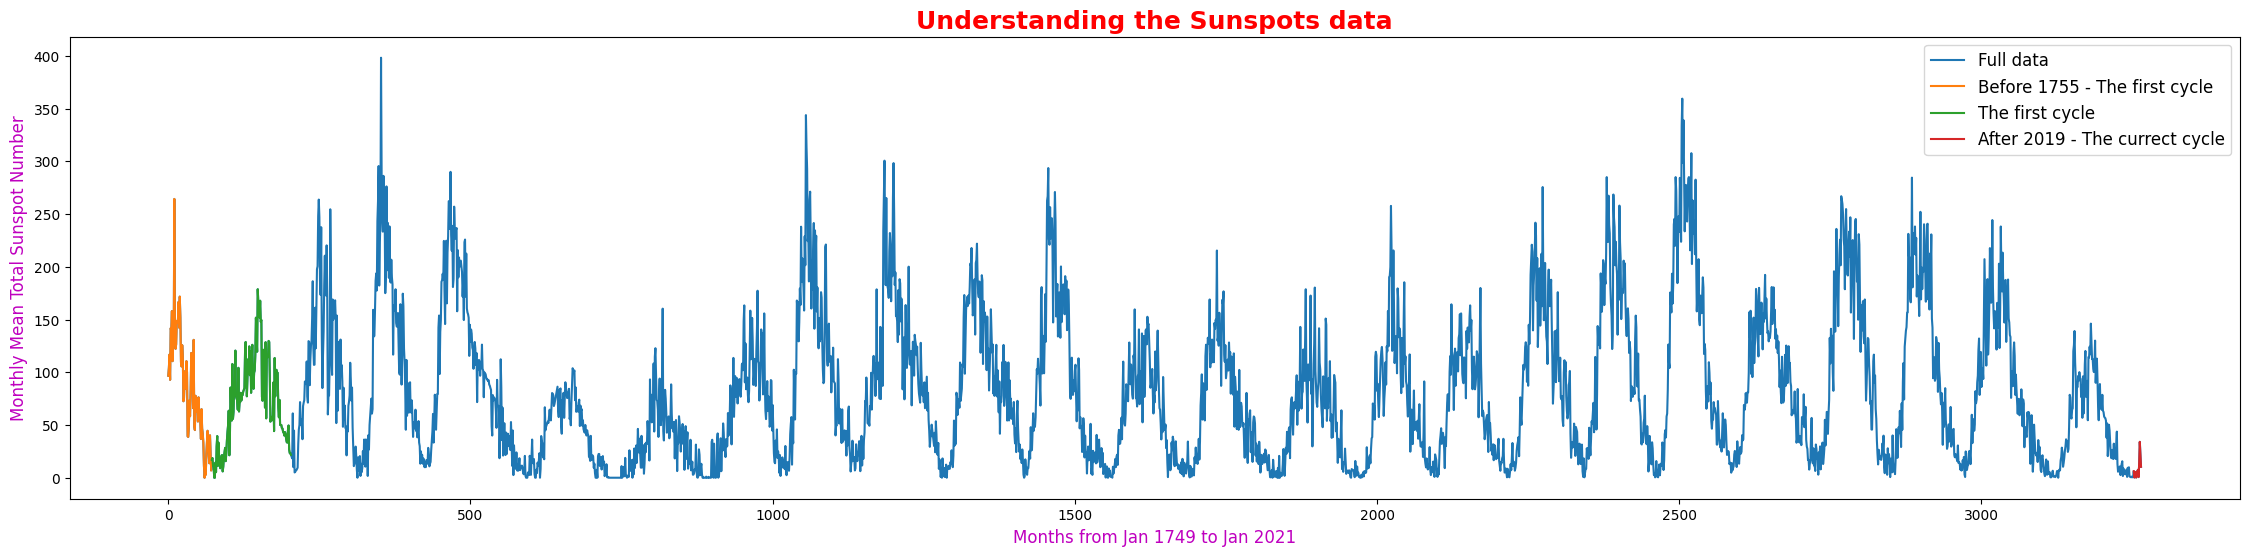

In [ ]:
# Highlighting the above points in our visualization
'''Approx 11 years cycle ---> approx 132 months cycle'''
plt.figure(figsize=(28,6))
plt.plot(sunspots)            # The whole data
plt.plot(sunspots[:72])       # Data from 1749, actual cycles started from 1755 --> 6 years means 72 months
plt.plot(sunspots[72:72+132]) # Showing the first cycle
plt.plot(sunspots[-13:])      # Displaying the current cycle
plt.ylabel(data.columns[-1], fontsize = 12, color = 'm')
plt.xlabel("Months from Jan 1749 to Jan 2021", fontsize = 12, color = 'm')
plt.title("Understanding the Sunspots data", fontsize = 18, color = 'r', weight = 'bold')
plt.legend(["Full data", "Before 1755 - The first cycle", "The first cycle", "After 2019 - The currect cycle"], fontsize = 12)
plt.show()

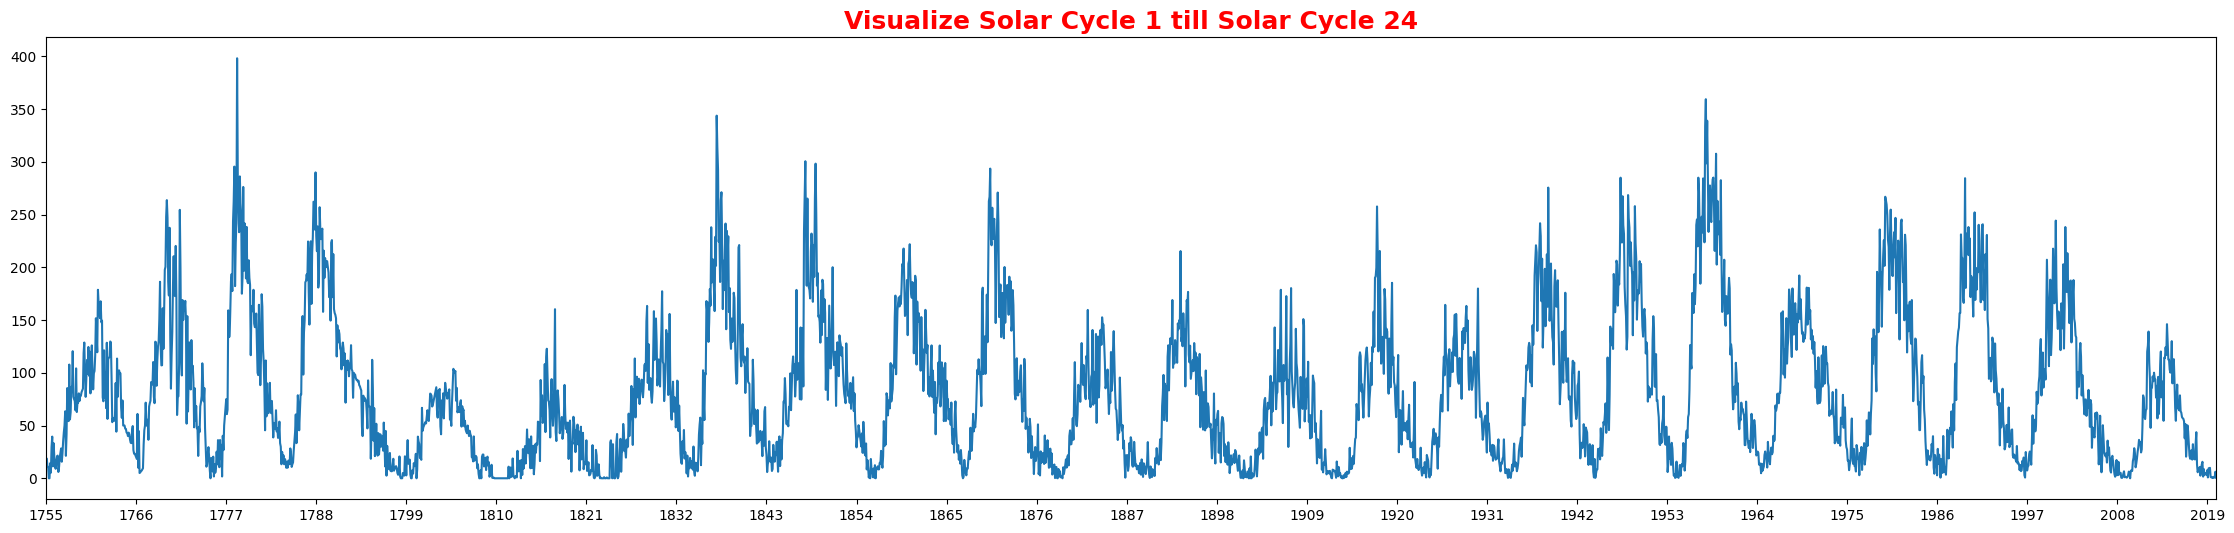

In [ ]:
# Some changes for a better visualization of solar cycles
'''Collect all the years from 1755 to 2019 and use it as xticklabels'''
years = []
start = 1755
for i in range(0, len(data.iloc[:,-1][72:]),132):
    years.append(start)
    start+=11

plt.figure(figsize = (28, 6))
plt.plot(sunspots[72:])
plt.title("Visualize Solar Cycle 1 till Solar Cycle 24", weight = 'bold', color = 'r', fontsize = 18)
plt.xlim(72, 3265-12)
plt.xticks(range(72, len(sunspots),132))
plt.gca().set_xticklabels(years)
plt.show()

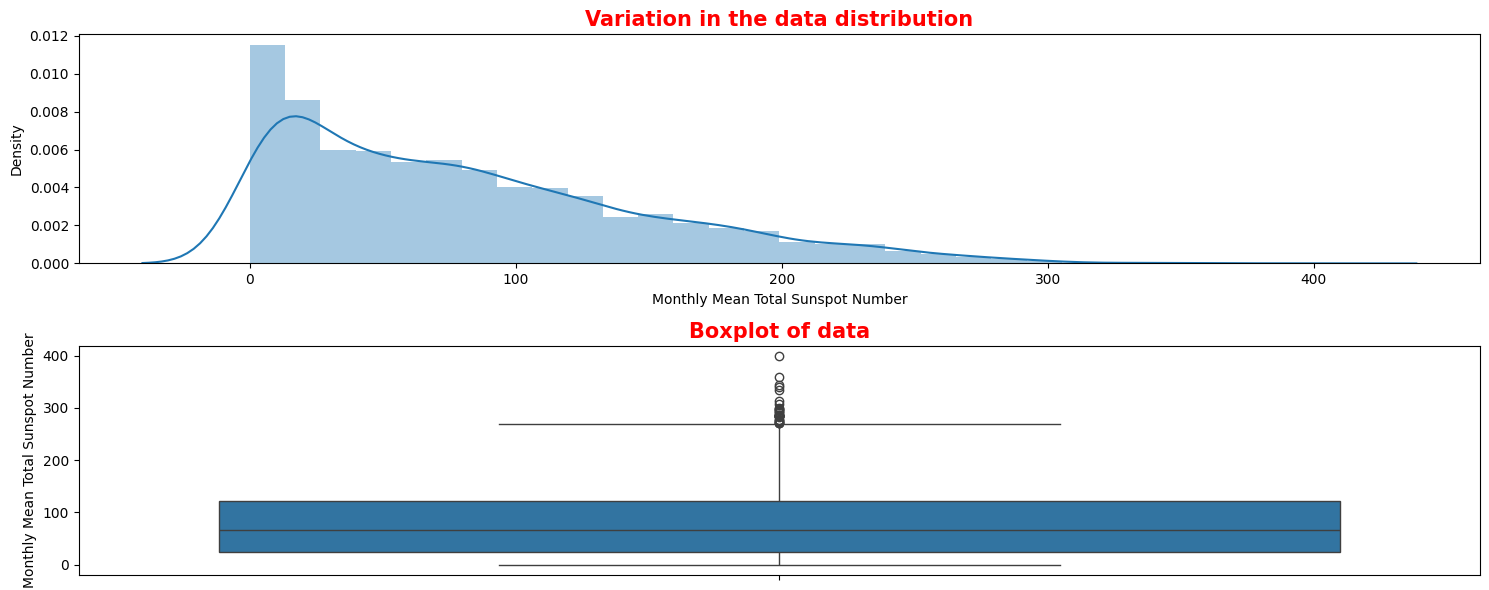

In [ ]:
# Visualise the variation in the data distribution along with the outliers in the time series data
plt.figure(figsize = (15,6))
plt.subplot(2, 1, 1)
sns.distplot(sunspots)
plt.title("Variation in the data distribution", fontsize = 15, color = 'r', weight = 'bold')
plt.subplot(2, 1, 2)
sns.boxplot(sunspots)
plt.title("Boxplot of data", fontsize = 15, color = 'r', weight = 'bold')
plt.tight_layout()
plt.show()

In [ ]:
#Helper function: Training data generation
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = series[:, np.newaxis]                                # Adding new dimension to the series array in the position where np.newaxis is written
    ds = tf.data.Dataset.from_tensor_slices(series)               # In order to use window of tensorflow convert numpy array to tensor
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True) # Creating window for generating sequence (yet not seperating it with the future values) - LSTM
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))          # Flatten a dataset of batches into a dataset of their elements
    ds = ds.shuffle(shuffle_buffer)                               # To reduce the variance and making sure that the model remain general and less overfits
    ds = ds.map(lambda w: (w[:-1], w[-1]))                        # In a window, last value is the future value that our model needs to learn and predict while testing it
    return ds.batch(batch_size).prefetch(1)

In [ ]:
# Forecast would work in the same way where we provide the sequence and the output will be predicted by the model
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(batch_size).prefetch(1)
    forecast = model.predict(ds)  # To predict
    return forecast

In [ ]:
# Preparing the data
import pandas as pd
import datetime
data=pd.read_csv("Sunspots.csv")
series = data['Monthly Mean Total Sunspot Number'].to_numpy()
# date = data['Date'].values
# date=np.array([datetime.datetime.strptime(x, '%Y-%m-%d') for x in date])
# time=np.array([x.month for x in date])

time= data['Unnamed: 0'].values
# Splitting the data into train and test
split_time = int(len(series)*0.9)          # 90% of the original data is for training
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:] #date
x_valid = series[split_time:] #monthly sunspot number
print(f"There are {len(x_train)} training samples and {len(x_valid)} validation samples.")

print(time_valid)

There are 2938 training samples and 327 validation samples.
[2938 2939 2940 2941 2942 2943 2944 2945 2946 2947 2948 2949 2950 2951
 2952 2953 2954 2955 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965
 2966 2967 2968 2969 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979
 2980 2981 2982 2983 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993
 2994 2995 2996 2997 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007
 3008 3009 3010 3011 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021
 3022 3023 3024 3025 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035
 3036 3037 3038 3039 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049
 3050 3051 3052 3053 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063
 3064 3065 3066 3067 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077
 3078 3079 3080 3081 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091
 3092 3093 3094 3095 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105
 3106 3107 3108 3109 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119
 3120 3121 3122 3

In [ ]:


# Parameters
delta = 1                      # Huber loss
window_size = 60               # For dataset
batch_size = 145               # For dataset
shuffle_buffer_size= 900       # Shuffling the dataset randomly
epochs = 100                   # For optimal learning rate
train_epochs = epochs + 0    # Training epochs
momentum_sgd = 0.9             # For optimizer



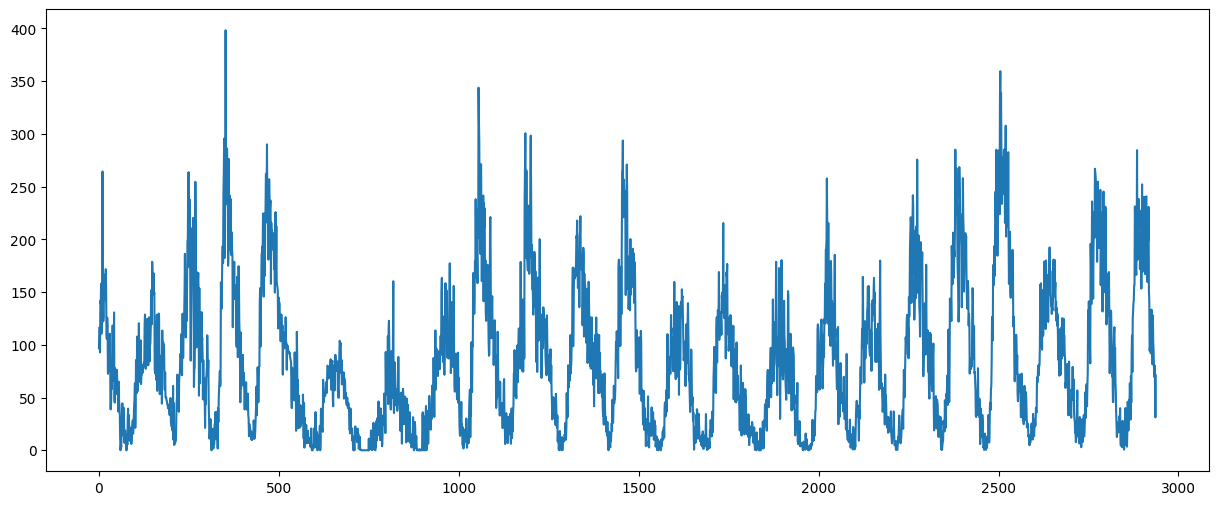

In [ ]:
# Training data graph
plt.figure(figsize=(15, 6))
plt.plot(time_train, x_train)
plt.show()

# LSTM

In [ ]:
loaded_LSTMmodel = load_model('SUNSPOTS_LSTM.h5')
loaded_LSTMmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 132)         660       
                                                                 
 lstm (LSTM)                 (None, None, 256)         398336    
                                                                 
 lstm_1 (LSTM)               (None, 132)               205392    
                                                                 
 dense (Dense)               (None, 80)                10640     
                                                                 
 dense_1 (Dense)             (None, 10)                810       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
 lambda (Lambda)             (None, 1)                 0

23/23 [==============================] - 7s 307ms/step


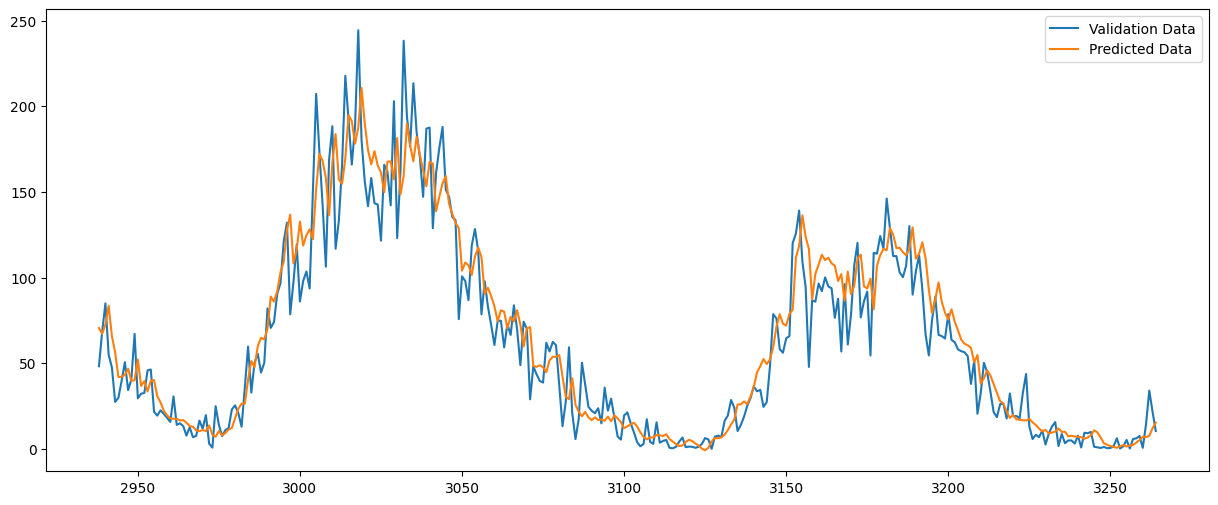

In [ ]:
rnn_forecast = model_forecast(loaded_LSTMmodel, series[:, np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, 0]  # rnn_forecast[-328:-1, 0]

# Plots
plt.figure(figsize=(15, 6))
plt.plot(time_valid, x_valid)
plt.plot(time_valid, rnn_forecast)

# plt.grid(visible=True, axis='both',)
plt.title("")
plt.legend(["Validation Data", "Predicted Data"])
plt.show()

In [ ]:
val_mae=tf.keras.metrics.mae(x_valid, rnn_forecast).numpy()
print(f"MAE on the validation data:- {val_mae}")

MAE on the validation data:- 13.184123992919922


# GRU

In [ ]:
loaded_GRUmodel = load_model('/content/SUNSPOTS_GRU .h5')
loaded_GRUmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, None, 132)         660       
                                                                 
 gru_2 (GRU)                 (None, None, 256)         299520    
                                                                 
 gru_3 (GRU)                 (None, 132)               154440    
                                                                 
 dense_3 (Dense)             (None, 80)                10640     
                                                                 
 dense_4 (Dense)             (None, 10)                810       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
 lambda_1 (Lambda)           (None, 1)                

23/23 [==============================] - 6s 249ms/step


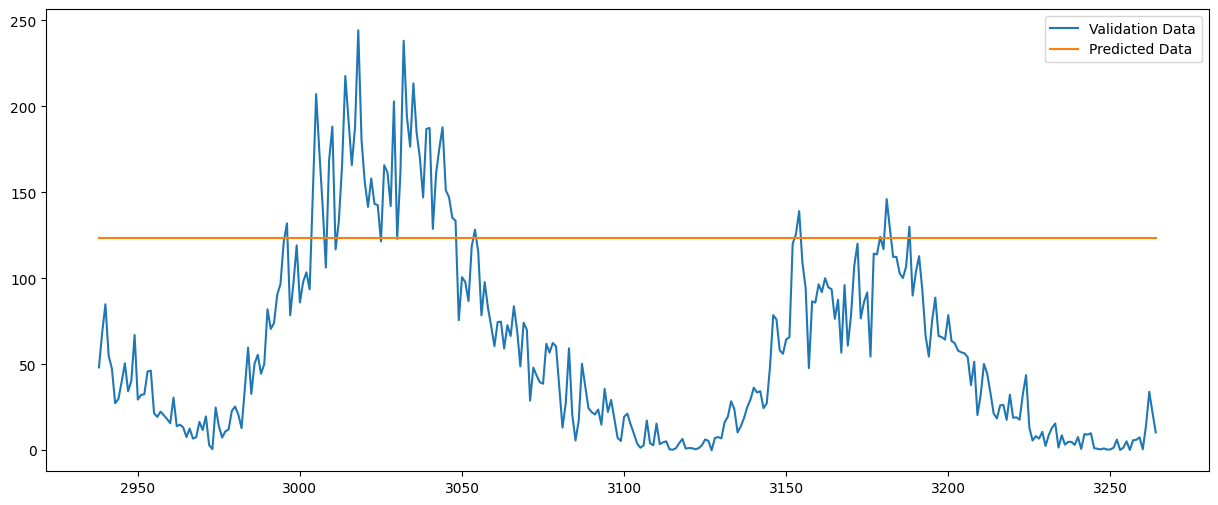

In [ ]:
# Call the model_forecast here and display the plots of validation and prediction
rnn_forecastGRU = model_forecast(loaded_GRUmodel, series[:, np.newaxis], window_size)
rnn_forecastGRU = rnn_forecastGRU[split_time - window_size:-1, 0]  # rnn_forecast[-328:-1, 0]

# Plots
plt.figure(figsize=(15, 6))
plt.plot(time_valid, x_valid)
plt.plot(time_valid, rnn_forecastGRU)
plt.title("")
plt.legend(["Validation Data", "Predicted Data"])
plt.show()

In [ ]:
val_mae=tf.keras.metrics.mae(x_valid, rnn_forecastGRU).numpy()
print(f"MAE on the validation data:- {val_mae}")

MAE on the validation data:- 74.92205047607422
